In [3]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [5]:

heads_proba  = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

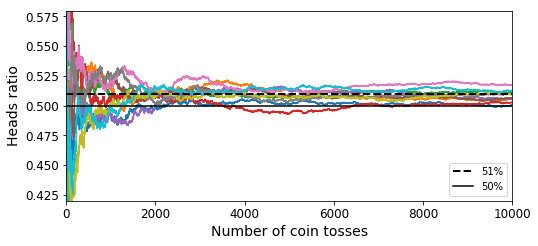

In [6]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500,noise=0.3,random_state=41)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 41)

In [25]:
y_train

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators = [('lr',log_clf)
                                            ,('rf',rnd_clf)
                                            ,('svc',svm_clf)]
                              ,voting = 'hard')

In [27]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [28]:

from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))
  

LogisticRegression 0.896
RandomForestClassifier 0.92
SVC 0.928
VotingClassifier 0.928


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [34]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)



In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.936


In [36]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))


0.904


In [ ]:

from sklearn.ensemble import RandomForestClassifier()
rnd_clf = RandomForestClassifier(n_estimators =500,max_leaf_nodes = 16,n_jobs= -1)
rnd_clf.fit(X_train,y_train)
y_pred_rf = rnd_clf.predict(X_test)


In [37]:

from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators = 500,n_jobs = -1)
rnd_clf.fit(iris['data'],iris['target'])
for name,score in zip(iris['feature_names'],rnd_clf.feature_importances_):
    print(name,score)


sepal length (cm) 0.09750135910789792
sepal width (cm) 0.024338168351911972
petal length (cm) 0.4319293458509918
petal width (cm) 0.4462311266891983


In [38]:
rnd_clf.feature_importances_

array([0.09750136, 0.02433817, 0.43192935, 0.44623113])

In [41]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [43]:

from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X,y2)



DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [46]:

y3 = y2-tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X,y3)
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in 
(tree_reg1,tree_reg2,tree_reg3))
y_pred

array([0.75026781])

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2,n_estimators = 3,learning_rate = 1.0)
gbrt.fit(X,y)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [50]:

import  numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train,X_val,y_train,y_val = train_test_split(X,y)
bgrt = GradientBoostingRegressor(max_depth = 2,n_estimators=120)
bgrt.fit(X_train,y_train)
errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]

In [51]:

best_n_estimators = np.argmin(errors)
bgrt_best = GradientBoostingRegressor(max_depth = 2,n_estimators=best_n_estimators)
bgrt_best.fit(X_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=2, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [53]:

bgrt = GradientBoostingRegressor(max_depth=2,warm_start = True)
min_val_error = float('inf')
error_going_up =0
for n_estimators in range(1,120):
    bgrt.n_estimator = n_estimators
    bgrt.fit(X_train,y_train)
    y_pred = bgrt.predict(X_val)
    val_error = mean_squared_error(y_val,y_pred)
    if val_error<min_val_error:
        min_val_error=val_error
        error_going_up=0
    else:
        error_going_up+=1
        if error_going_up ==5:
            break 

In [54]:
print(gbrt.n_estimators)

3


In [58]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [59]:
if xgboost is not None:  # not shown in the book
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    print("Validation MSE:", val_error)

Validation MSE: 0.004360038504971607


In [60]:
if xgboost is not None:  # not shown in the book
    xgb_reg.fit(X_train, y_train,
                eval_set=[(X_val, y_val)], early_stopping_rounds=2)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    print("Validation MSE:", val_error)

[0]	validation_0-rmse:0.308403
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.280384
[2]	validation_0-rmse:0.255261
[3]	validation_0-rmse:0.232697
[4]	validation_0-rmse:0.211968
[5]	validation_0-rmse:0.192675
[6]	validation_0-rmse:0.177464
[7]	validation_0-rmse:0.163445
[8]	validation_0-rmse:0.151159
[9]	validation_0-rmse:0.140248
[10]	validation_0-rmse:0.130624
[11]	validation_0-rmse:0.121576
[12]	validation_0-rmse:0.113691
[13]	validation_0-rmse:0.106864
[14]	validation_0-rmse:0.101159
[15]	validation_0-rmse:0.095552
[16]	validation_0-rmse:0.091277
[17]	validation_0-rmse:0.087887
[18]	validation_0-rmse:0.084786
[19]	validation_0-rmse:0.081612
[20]	validation_0-rmse:0.079539
[21]	validation_0-rmse:0.077531
[22]	validation_0-rmse:0.076274
[23]	validation_0-rmse:0.074814
[24]	validation_0-rmse:0.073593
[25]	validation_0-rmse:0.072558
[26]	validation_0-rmse:0.071551
[27]	validation_0-rmse:0.070612
[28]	validation_0-rmse:0.070049
[29]	validation_0-

In [61]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train) if xgboost is not None else None

8.24 ms ± 154 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
